# Sensitivity of PCA for methodological decisions

In [1]:
#import the packags
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import zscore
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# import the data set of standardized indicators
df_original = pd.read_csv('df_standardize_statistically_selected.csv').set_index('Adm3')

## 01. Determine the social vulnerability scores with all methodological combinations
Use the basic method as presented in 04_PCA_spatial.

However in the specified methodologial decisions, use the set ups as presented below.

1. select the rotation method 

#### Rotation - Varimax

In [ ]:
#use factor analyzer to calculate PCA with varimax rotation or 'unrotated roation'

fa = FactorAnalyzer(n_factors=20, method='principal', rotation='varimax')
fa.fit(df_original)
loadings_all = fa.loadings_.round(2)


#### Rotation - Unrotated

In [ ]:
#use factor analyzer to calculate PCA with varimax rotation or 'unrotated roation'

fa = FactorAnalyzer(n_factors=20, method='principal', rotation=None)
fa.fit(df_original)
loadings_all = fa.loadings_.round(2)


2. is based on explained variance, sort the data set, if kaiser criterion select the eigen values greater then 1 

#### No. Components - Explained variance

In [ ]:
# append the dataframe with the explained variance of each principal component
variance = fa.get_factor_variance()[1]

df.loc[len(df.index)] = variance

# sort the data frame based on the explained variance 
df_sorted = df.sort_values(by =20, axis=1,ascending=False)


In [ ]:
# add a row with the cumulative variance to the data frame
cumulative_variance = []
cum_variance = 0

for i in df_sorted.columns:
    cum_variance += df_sorted[i][20]
    cumulative_variance.append(cum_variance)

#### No. Components - Kaiser Criterion

In [ ]:
#plots original and common factor eigen values
fa.get_eigenvalues()

3. If mathematical: only use the first PC, if weighted weigh for counting

#### Weighted sum based on variance

In [ ]:
# weighted sum based on variance
list_weights = []
for i in range(len(df_sorted)-2):
    variance = df_sorted.iloc[20, i]
    weight = variance / 1
    list_weights.append(weight)
    
list_weights

scores = scores*list_weights[:6]
scores['vulnerability'] = scores.sum(axis=1)

#### Mathimatical


In [ ]:
scores['vulnerability'] = scores['PC1']

#### Sum

In [ ]:
scores['vulnerability'] = scores.sum(axis=1)

## 02. Create a csv for all combinations

In [ ]:
df_1 = pd.read_csv('vulnerability_combination1.csv', decimal = ',')
df_2 = pd.read_csv('vulnerability_combination2.csv', decimal = ',')
df_3 = pd.read_csv('vulnerability_combination3.csv', decimal = ',')
df_4 = pd.read_csv('vulnerability_combination4.csv', decimal = ',')
df_5 = pd.read_csv('vulnerability_combination5.csv', decimal = ',')
df_6 = pd.read_csv('vulnerability_combination6.csv', decimal = ',')
df_7 = pd.read_csv('vulnerability_combination7.csv', decimal = ',')
df_8 = pd.read_csv('vulnerability_combination8.csv', decimal = ',')
df_9 = pd.read_csv('vulnerability_combination9.csv', decimal = ',')
df_10 = pd.read_csv('vulnerability_combination10.csv', decimal = ',')
df_11 = pd.read_csv('vulnerability_combination11.csv', decimal = ',')
df_12 = pd.read_csv('vulnerability_combination12.csv', decimal = ',')

## 03. Normalize all vulnerability scores

In [5]:
cols = ['vulnerability']
df_1[cols] = df_1[cols].apply(pd.to_numeric, errors='coerce')
# Calculate the zscores and drop zscores into new column
df_1['vulnerability_z_score'] = zscore(df_1['vulnerability'])


In [7]:
df_2[cols] = df_2[cols].apply(pd.to_numeric, errors='coerce')
# Calculate the zscores and drop zscores into new column
df_2['vulnerability_z_score'] = zscore(df_2['vulnerability'])

In [8]:
df_3[cols] = df_3[cols].apply(pd.to_numeric, errors='coerce')
# Calculate the zscores and drop zscores into new column
df_3['vulnerability_z_score'] = zscore(df_3['vulnerability'])

In [9]:
df_4[cols] = df_4[cols].apply(pd.to_numeric, errors='coerce')
# Calculate the zscores and drop zscores into new column
df_4['vulnerability_z_score'] = zscore(df_4['vulnerability'])

In [10]:
df_5[cols] = df_5[cols].apply(pd.to_numeric, errors='coerce')
# Calculate the zscores and drop zscores into new column
df_5['vulnerability_z_score'] = zscore(df_5['vulnerability'])

In [11]:
df_6[cols] = df_6[cols].apply(pd.to_numeric, errors='coerce')
# Calculate the zscores and drop zscores into new column
df_6['vulnerability_z_score'] = zscore(df_6['vulnerability'])

In [12]:
df_7[cols] = df_7[cols].apply(pd.to_numeric, errors='coerce')
# Calculate the zscores and drop zscores into new column
df_7['vulnerability_z_score'] = zscore(df_7['vulnerability'])

In [13]:
df_8[cols] = df_8[cols].apply(pd.to_numeric, errors='coerce')
# Calculate the zscores and drop zscores into new column
df_8['vulnerability_z_score'] = zscore(df_8['vulnerability'])

In [14]:
df_9[cols] = df_9[cols].apply(pd.to_numeric, errors='coerce')
# Calculate the zscores and drop zscores into new column
df_9['vulnerability_z_score'] = zscore(df_9['vulnerability'])

In [15]:
df_10[cols] = df_10[cols].apply(pd.to_numeric, errors='coerce')
# Calculate the zscores and drop zscores into new column
df_10['vulnerability_z_score'] = zscore(df_10['vulnerability'])

In [16]:
df_11[cols] = df_11[cols].apply(pd.to_numeric, errors='coerce')
# Calculate the zscores and drop zscores into new column
df_11['vulnerability_z_score'] = zscore(df_11['vulnerability'])

In [17]:
df_12[cols] = df_12[cols].apply(pd.to_numeric, errors='coerce')
# Calculate the zscores and drop zscores into new column
df_12['vulnerability_z_score'] = zscore(df_12['vulnerability'])

## 04. Merge all results in one data frame

In [ ]:
frames = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12]

result = pd.concat(frames)

## 05. Verify the distributiom of all the scores 

In [ ]:
result['vulnerability_z_score'].hist()

## 06. Remove the outliers

In [ ]:
result_outliers = result.loc[np.abs(result['vulnerability_z_score']) <= 1.5]
result_outliers.to_csv('dataframe_for_spss_without_outliers.csv', decimal = ',', sep = ';')

## 07. Set up the data frame for three way ANOVA

In [ ]:
df_1['Combi2'] = list(df_2['vulnerability_z_score'])
df_1['Combi3'] = list(df_3['vulnerability_z_score'])
df_1['Combi4'] = list(df_4['vulnerability_z_score'])
df_1['Combi5'] = list(df_5['vulnerability_z_score'])
df_1['Combi6'] = list(df_6['vulnerability_z_score'])
df_1['Combi7'] = list(df_7['vulnerability_z_score'])
df_1['Combi8'] = list(df_8['vulnerability_z_score'])
df_1['Combi9'] = list(df_9['vulnerability_z_score'])
df_1['Combi10'] = list(df_10['vulnerability_z_score'])
df_1['Combi11'] = list(df_11['vulnerability_z_score'])
df_1['Combi12'] = list(df_12['vulnerability_z_score'])

In [ ]:
df_1 = df_1.drop(['vulnerability', 'no_components', 'weighted', 'rotation'], axis = 1).set_index('Adm3')

In [ ]:
df = df_1.rename(columns={'vulnerability_z_score': 'Combi1'})

In [ ]:
df = df[(np.abs((df)) < 1.5).all(axis=1)]

In [ ]:
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['Adm3'], value_vars=['Combi1', 'Combi2', 'Combi3', 'Combi4', 'Combi5',
       'Combi6', 'Combi7', 'Combi8', 'Combi9', 'Combi10', 'Combi11',
       'Combi12'])
# replace column names
df_melt.columns = ['index', 'methods', 'value']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(40,40)})


ax = sns.boxplot(x='methods', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="methods", y="value", data=df_melt, color='#7d0013')
plt.title('Distribution of social vulnerability for each combination of methods', fontsize = 25, fontname="Times New Roman", fontweight = 'bold')
plt.yticks(fontsize=25, fontname="Times New Roman")
plt.xticks(fontsize=25, fontname="Times New Roman")
plt.ylabel('Normalized value of social vulnerability', fontsize = 25, fontname='Times New Roman')
plt.xlabel('Combination of methods', fontsize = 25, fontname='Times New Roman')
plt.savefig('Distribution_social_vuln.png')
plt.show();

In [ ]:
# import the data
data = pd.read_csv('dataframe_for_spss_without_outliers.csv', delimiter = ';', decimal = ',').set_index('Adm3')
data = data.drop(['Unnamed: 0'],axis =1)

In [ ]:
cols = ['vulnerability_z_score']
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
#execute anova
model = ols("vulnerability_z_score ~ C(no_components, Sum) + C(weighted, Sum) + C(rotation, Sum) + C(no_components, Sum)*C(weighted, Sum)*C(rotation, Sum)", 
            data=data).fit()

aov_table = sm.stats.anova_lm(model, typ=3)
aov_table

## 08. Interpretate results

In [ ]:
vari_kaiser_math = df_2['vulnerability_z_score'].mean()
unrota_kaiser_math = df_4['vulnerability_z_score'].mean()
vari_kaiser_sum =df_6['vulnerability_z_score'].mean()
unrota_kaiser_sum = df_7['vulnerability_z_score'].mean()
vari_kaiser_sumvariance = df_9['vulnerability_z_score'].mean()
unrota_kaiser_sum_variance = df_11['vulnerability_z_score'].mean()

In [ ]:
vari_kaiser = [vari_kaiser_math, vari_kaiser_sum, vari_kaiser_sumvariance]
unrotated_kaiser = [unrota_kaiser_math, unrota_kaiser_sum, unrota_kaiser_sum_variance]

In [ ]:
df_plot = pd.DataFrame()
df_plot['Unrotated rotation'] = unrotated_kaiser
df_plot['Varimax rotation'] = vari_kaiser
df_plot['method'] = ['Mathematical', 'Sum', 'Weighted sum']
df_plot = df_plot.set_index('method')

In [ ]:
df_plot_melt = pd.melt(df_plot.reset_index(), id_vars=['method'], value_vars=['Unrotated rotation', 'Varimax rotation'])

In [ ]:
df_plot_melt = df_plot_melt.rename(columns={'variable': 'Method selected for rotation'})

In [ ]:
sns.set(rc={'figure.figsize':(15,15)})
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sns.lineplot(data = df_plot_melt,x="method", y="value", hue = 'Method selected for rotation', linewidth = 3)
plt.xlabel("Selected weighting method", fontsize = 25, fontname='Times New Roman')
plt.ylabel("Mean of social vulnerability z-score",fontsize = 25, fontname='Times New Roman')
plt.title('Interaction plot of weighting and rotation method used,\n based on the Kaiser criterion', fontsize = 25, fontname="Times New Roman", fontweight = 'bold')
plt.yticks(fontsize=25, fontname="Times New Roman")
plt.xticks(fontsize=25, fontname="Times New Roman")
plt.savefig('Interaction_Kaiser.png')
plt.show();

In [ ]:
vari_variance_math = df_5['vulnerability_z_score'].mean()
unrota_variance_math = df_3['vulnerability_z_score'].mean()
vari_variance_sum =df_1['vulnerability_z_score'].mean()
unrota_variance_sum = df_8['vulnerability_z_score'].mean()
vari_variance_sumvariance = df_12['vulnerability_z_score'].mean()
unrota_variance_sum_variance = df_10['vulnerability_z_score'].mean()

In [ ]:
vari_variance = [vari_variance_math, vari_variance_sum, vari_variance_sumvariance]
unrotated_variance = [unrota_variance_math, unrota_variance_sum, unrota_variance_sum_variance]

In [ ]:
# df_plot = pd.DataFrame()
df_plot['Unrotated rotation'] = unrotated_variance
df_plot['Varimax rotation'] = vari_variance
df_plot['method'] = ['Mathematical', 'Sum', 'Weighted sum']
df_plot = df_plot.set_index('method')

In [115]:
df_plot_melt = pd.melt(df_plot.reset_index(), id_vars=['method'], value_vars=['Unrotated rotation', 'Varimax rotation'])

In [116]:
df_plot_melt.set_index('method')
df_plot_melt = df_plot_melt.rename(columns={'variable': 'Method selected for rotation'})

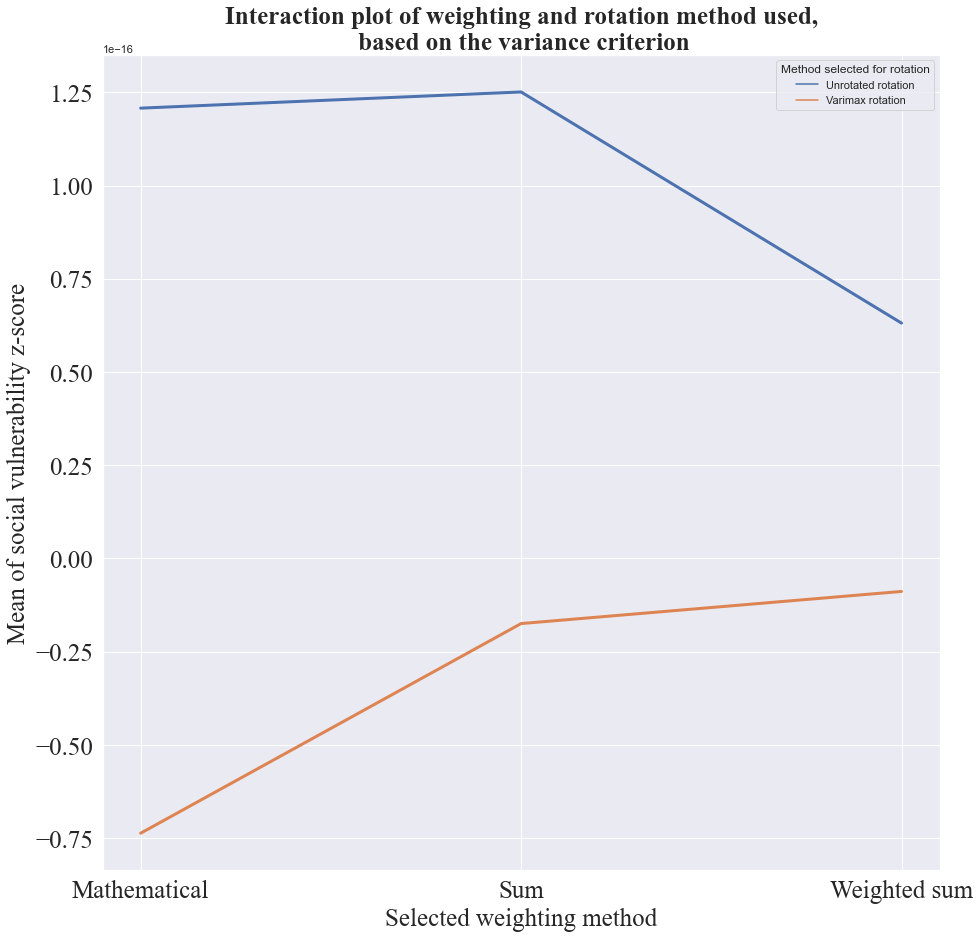

In [119]:
sns.set(rc={'figure.figsize':(15,15)})
sns.set_theme(style='darkgrid')
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sns.lineplot(data = df_plot_melt,x="method", y="value", hue = 'Method selected for rotation', linewidth = 3)
plt.xlabel("Selected weighting method", fontsize = 25, fontname='Times New Roman')
plt.ylabel("Mean of social vulnerability z-score",fontsize = 25, fontname='Times New Roman')
plt.title('Interaction plot of weighting and rotation method used,\n based on the variance criterion', fontsize = 25, fontname="Times New Roman", fontweight = 'bold')
plt.yticks(fontsize=25, fontname="Times New Roman")
plt.xticks(fontsize=25, fontname="Times New Roman")
plt.savefig('Interaction_Variance.png')
plt.show();

## 09. Tukey

In [61]:
import statsmodels.stats.multicomp as mc

interaction_groups = "Components_" + data.no_components.astype(str) + " & " + "Weighted_" + data.weighted.astype(str) + "&" + "Rotation_"+ data.rotation.astype(str)

comp = mc.MultiComparison(data["vulnerability_z_score"], interaction_groups)
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()
tukey_alle = post_hoc_res.summary()

In [63]:
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Components_kaiser & Weighted_mathematic&Rotation_unrotated,Components_kaiser & Weighted_mathematic&Rotation_varimax,-0.0017,0.9,-0.1134,0.11,False
Components_kaiser & Weighted_mathematic&Rotation_unrotated,Components_kaiser & Weighted_sum weighted&Rotation_unrotated,0.2939,0.001,0.2027,0.3851,True
Components_kaiser & Weighted_mathematic&Rotation_unrotated,Components_kaiser & Weighted_sum&Rotation_unrotated,0.1016,0.1027,-0.0089,0.212,False
Components_kaiser & Weighted_mathematic&Rotation_unrotated,Components_kaiser & Weighted_sum&Rotation_varimax,0.1016,0.1027,-0.0089,0.212,False
Components_kaiser & Weighted_mathematic&Rotation_unrotated,Components_variance & Weighted_mathematic&Rotation_varimax,-0.0017,0.9,-0.1134,0.11,False
Components_kaiser & Weighted_mathematic&Rotation_unrotated,Components_variance & Weighted_sum weighted&Rotation_unrotated,0.0202,0.9,-0.0916,0.132,False
Components_kaiser & Weighted_mathematic&Rotation_unrotated,Components_variance & Weighted_sum weighted&Rotation_varimax,0.1635,0.001,0.0528,0.2741,True
Components_kaiser & Weighted_mathematic&Rotation_unrotated,Components_variance & Weighted_sum&Rotation_unrotated,0.0317,0.9,-0.0802,0.1436,False
Components_kaiser & Weighted_mathematic&Rotation_unrotated,Components_variance & Weighted_sum&Rotation_varimax,0.2822,0.001,0.1717,0.3926,True
Components_kaiser & Weighted_mathematic&Rotation_varimax,Components_kaiser & Weighted_sum weighted&Rotation_unrotated,0.2956,0.001,0.1842,0.4071,True


## 10. Variance in Ranking

In [182]:
df_1 = df_1.sort_values(by =['vulnerability_z_score'], ascending= False)
df_1['ranking_1'] =  np.arange(len(df_1))+1
df_2 = df_2.sort_values(by =['vulnerability_z_score'], ascending= False)
df_2['ranking_2'] =  np.arange(len(df_2))+1
df_3 = df_3.sort_values(by =['vulnerability_z_score'], ascending= False)
df_3['ranking_3'] =  np.arange(len(df_3))+1
df_4 = df_4.sort_values(by =['vulnerability_z_score'], ascending= False)
df_4['ranking_4'] =  np.arange(len(df_4))+1
df_5 = df_5.sort_values(by =['vulnerability_z_score'], ascending= False)
df_5['ranking_5'] =  np.arange(len(df_5))+1
df_6 = df_6.sort_values(by =['vulnerability_z_score'], ascending= False)
df_6['ranking_6'] =  np.arange(len(df_6))+1
df_7 = df_7.sort_values(by =['vulnerability_z_score'], ascending= False)
df_7['ranking_7'] =  np.arange(len(df_7))+1
df_8 = df_8.sort_values(by =['vulnerability_z_score'], ascending= False)
df_8['ranking_8'] =  np.arange(len(df_8))+1
df_9 = df_9.sort_values(by =['vulnerability_z_score'], ascending= False)
df_9['ranking_9'] =  np.arange(len(df_9))+1
df_10= df_10.sort_values(by =['vulnerability_z_score'], ascending= False)
df_10['ranking_10'] =  np.arange(len(df_10))+1
df_11 = df_11.sort_values(by =['vulnerability_z_score'], ascending= False)
df_11['ranking_11'] =  np.arange(len(df_10))+1
df_12 = df_12.sort_values(by =['vulnerability_z_score'], ascending= False)
df_12['ranking_12'] =  np.arange(len(df_10))+1

In [183]:
df_1 = df_1.sort_values(by=['Adm3'], ascending = True)
df_2 = df_2.sort_values(by=['Adm3'], ascending = True)
df_3 = df_3.sort_values(by=['Adm3'], ascending = True)
df_4 = df_4.sort_values(by=['Adm3'], ascending = True)
df_5 = df_5.sort_values(by=['Adm3'], ascending = True)
df_6 = df_6.sort_values(by=['Adm3'], ascending = True)
df_7 = df_7.sort_values(by=['Adm3'], ascending = True)
df_8 = df_8.sort_values(by=['Adm3'], ascending = True)
df_9 = df_9.sort_values(by=['Adm3'], ascending = True)
df_10 = df_10.sort_values(by=['Adm3'], ascending = True)
df_11 = df_11.sort_values(by=['Adm3'], ascending = True)
df_12 = df_12.sort_values(by=['Adm3'], ascending = True)

In [197]:
df_ranking = df_1
df_ranking['ranking_2'] = list(df_2['ranking_2'])
df_ranking['ranking_3'] = list(df_3['ranking_3'])
df_ranking['ranking_4'] = list(df_4['ranking_4'])
df_ranking['ranking_5'] = list(df_5['ranking_5'])
df_ranking['ranking_6'] = list(df_6['ranking_6'])
df_ranking['ranking_7'] = list(df_7['ranking_7'])
df_ranking['ranking_8'] = list(df_8['ranking_8'])
df_ranking['ranking_9'] = list(df_9['ranking_9'])
df_ranking['ranking_10'] = list(df_10['ranking_10'])
df_ranking['ranking_11'] = list(df_12['ranking_11'])
df_ranking['ranking_12'] = list(df_12['ranking_12'])

In [199]:
df_ranking = df_ranking.drop(['vulnerability_z_score', 'Combi2', 'Combi3', 'Combi4', 'Combi5',
       'Combi6', 'Combi7', 'Combi8', 'Combi9', 'Combi10', 'Combi11', 'Combi12'], axis = 1)

In [200]:
#df_ranking['mean'] = df_ranking.mean(axis=1)
#df_ranking['variance'] = df_ranking.var(axis=1)
df_ranking['std'] = df_ranking.std(axis=1)

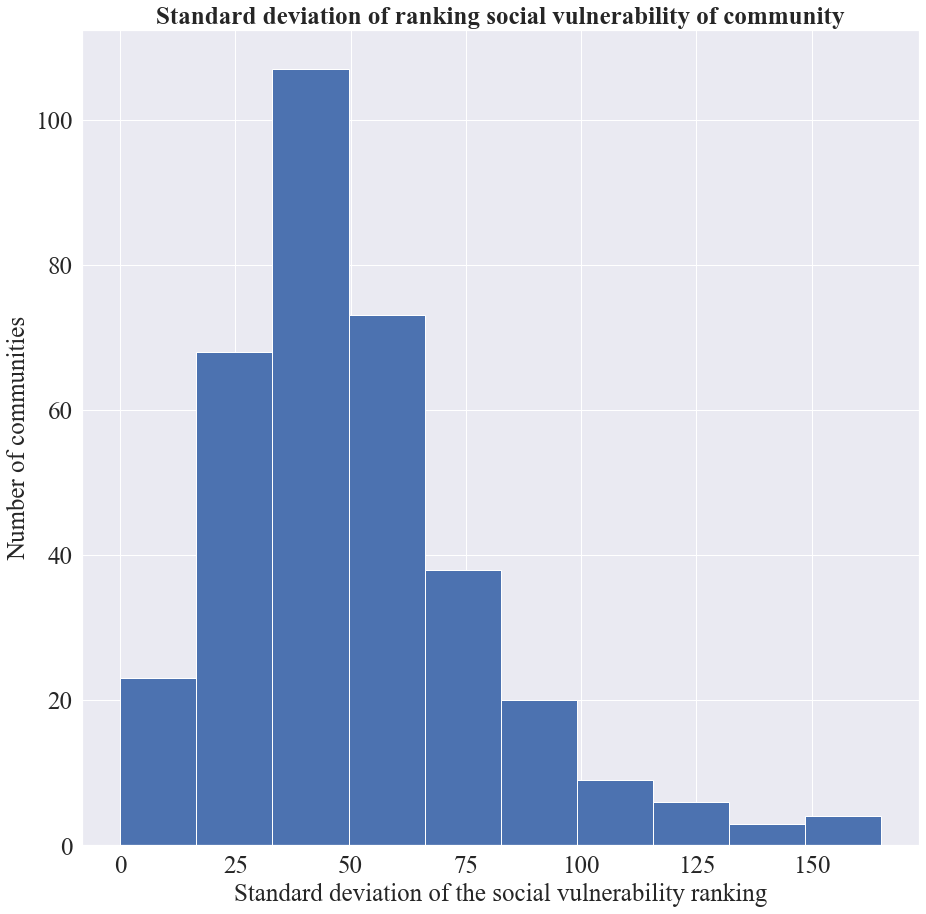

In [203]:
df_ranking['std'].hist()
plt.xlabel("Standard deviation of the social vulnerability ranking", fontsize = 25, fontname='Times New Roman')
plt.ylabel("Number of communities",fontsize = 25, fontname='Times New Roman')
plt.title('Standard deviation of ranking social vulnerability of community', fontsize = 25, fontname="Times New Roman", fontweight = 'bold')
plt.yticks(fontsize=25, fontname="Times New Roman")
plt.xticks(fontsize=25, fontname="Times New Roman")
plt.savefig('Afwijking_ranking.png')
plt.show();